In [25]:
import csv
import matplotlib.pyplot as plt
import pandas as pd

In [26]:
df = pd.read_csv(f'/home/156/jm0124/kae-cyclones/src/diss0.csv', on_bad_lines='skip')

In [27]:
df.columns = ['run', 'penalty', 'init', 'loss', 'val_loss']

In [28]:
for index in range(0,len(df)):
    if index >= 4499:
        df.loc[index,'penalty'] = 'no-penalty'

In [29]:
df.loc[4498]

run               0
penalty     inverse
init        uniform
loss        0.31106
val_loss    0.07537
Name: 4498, dtype: object

In [30]:
final_list_loss_diss0 = {}
final_list_val_diss0 = {}

for dictionary in [final_list_loss_diss0, final_list_val_diss0]:
    avg_list = [[],[],[]]
    prev_penalty ='max'
    prev_init = 'uniform'
    
    for index, row in df.iterrows():
        if row['penalty'] == prev_penalty and row['init'] == prev_init:
            if dictionary == final_list_loss_diss0:
                avg_list[row['run']].append(row['loss'])
            else:
                avg_list[row['run']].append(row['val_loss'])
        else:
            final_list = []
            for i in range(0, len(avg_list[0])-1):
                avg = 0
                for l in range(0,len(avg_list)):
                    try:
                        avg += avg_list[l][i]/len(avg_list)
                    except:
                        avg += 0
                final_list.append(avg)
            dictionary[f"{prev_penalty}-{prev_init}"] = final_list

            prev_penalty = row['penalty']
            prev_init = row['init']

            avg_list = [[],[],[]]
            avg_list[row['run']].append(row['loss'])
    
    final_list = []
    for i in range(0, len(avg_list[0])-1):
        avg = 0
        for l in range(0,len(avg_list)):
            try:
                avg += avg_list[l][i]/len(avg_list)
            except:
                avg += 0
        final_list.append(avg)
    dictionary[f"{prev_penalty}-{prev_init}"] = final_list

In [31]:
final_list_loss_diss0.keys()

dict_keys(['max-uniform', 'max-gaussian', 'max-double-gaussian', 'max-uniform-small', 'max-gaussian element', 'average-uniform', 'average-gaussian', 'average-double-gaussian', 'average-uniform-small', 'average-gaussian element', 'inverse-uniform', 'inverse-gaussian', 'inverse-double-gaussian', 'inverse-uniform-small', 'inverse-gaussian element', 'no-penalty-uniform', 'no-penalty-gaussian', 'no-penalty-double-gaussian', 'no-penalty-uniform-small', 'no-penalty-gaussian element'])

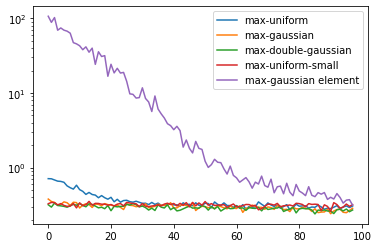

In [32]:
for label, item_list in final_list_loss_diss0.items():
    if label.startswith('max'):
        plt.plot(list(range(0,98)),item_list[:98], label=str(label))
plt.yscale('log')
plt.legend()
plt.show()


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


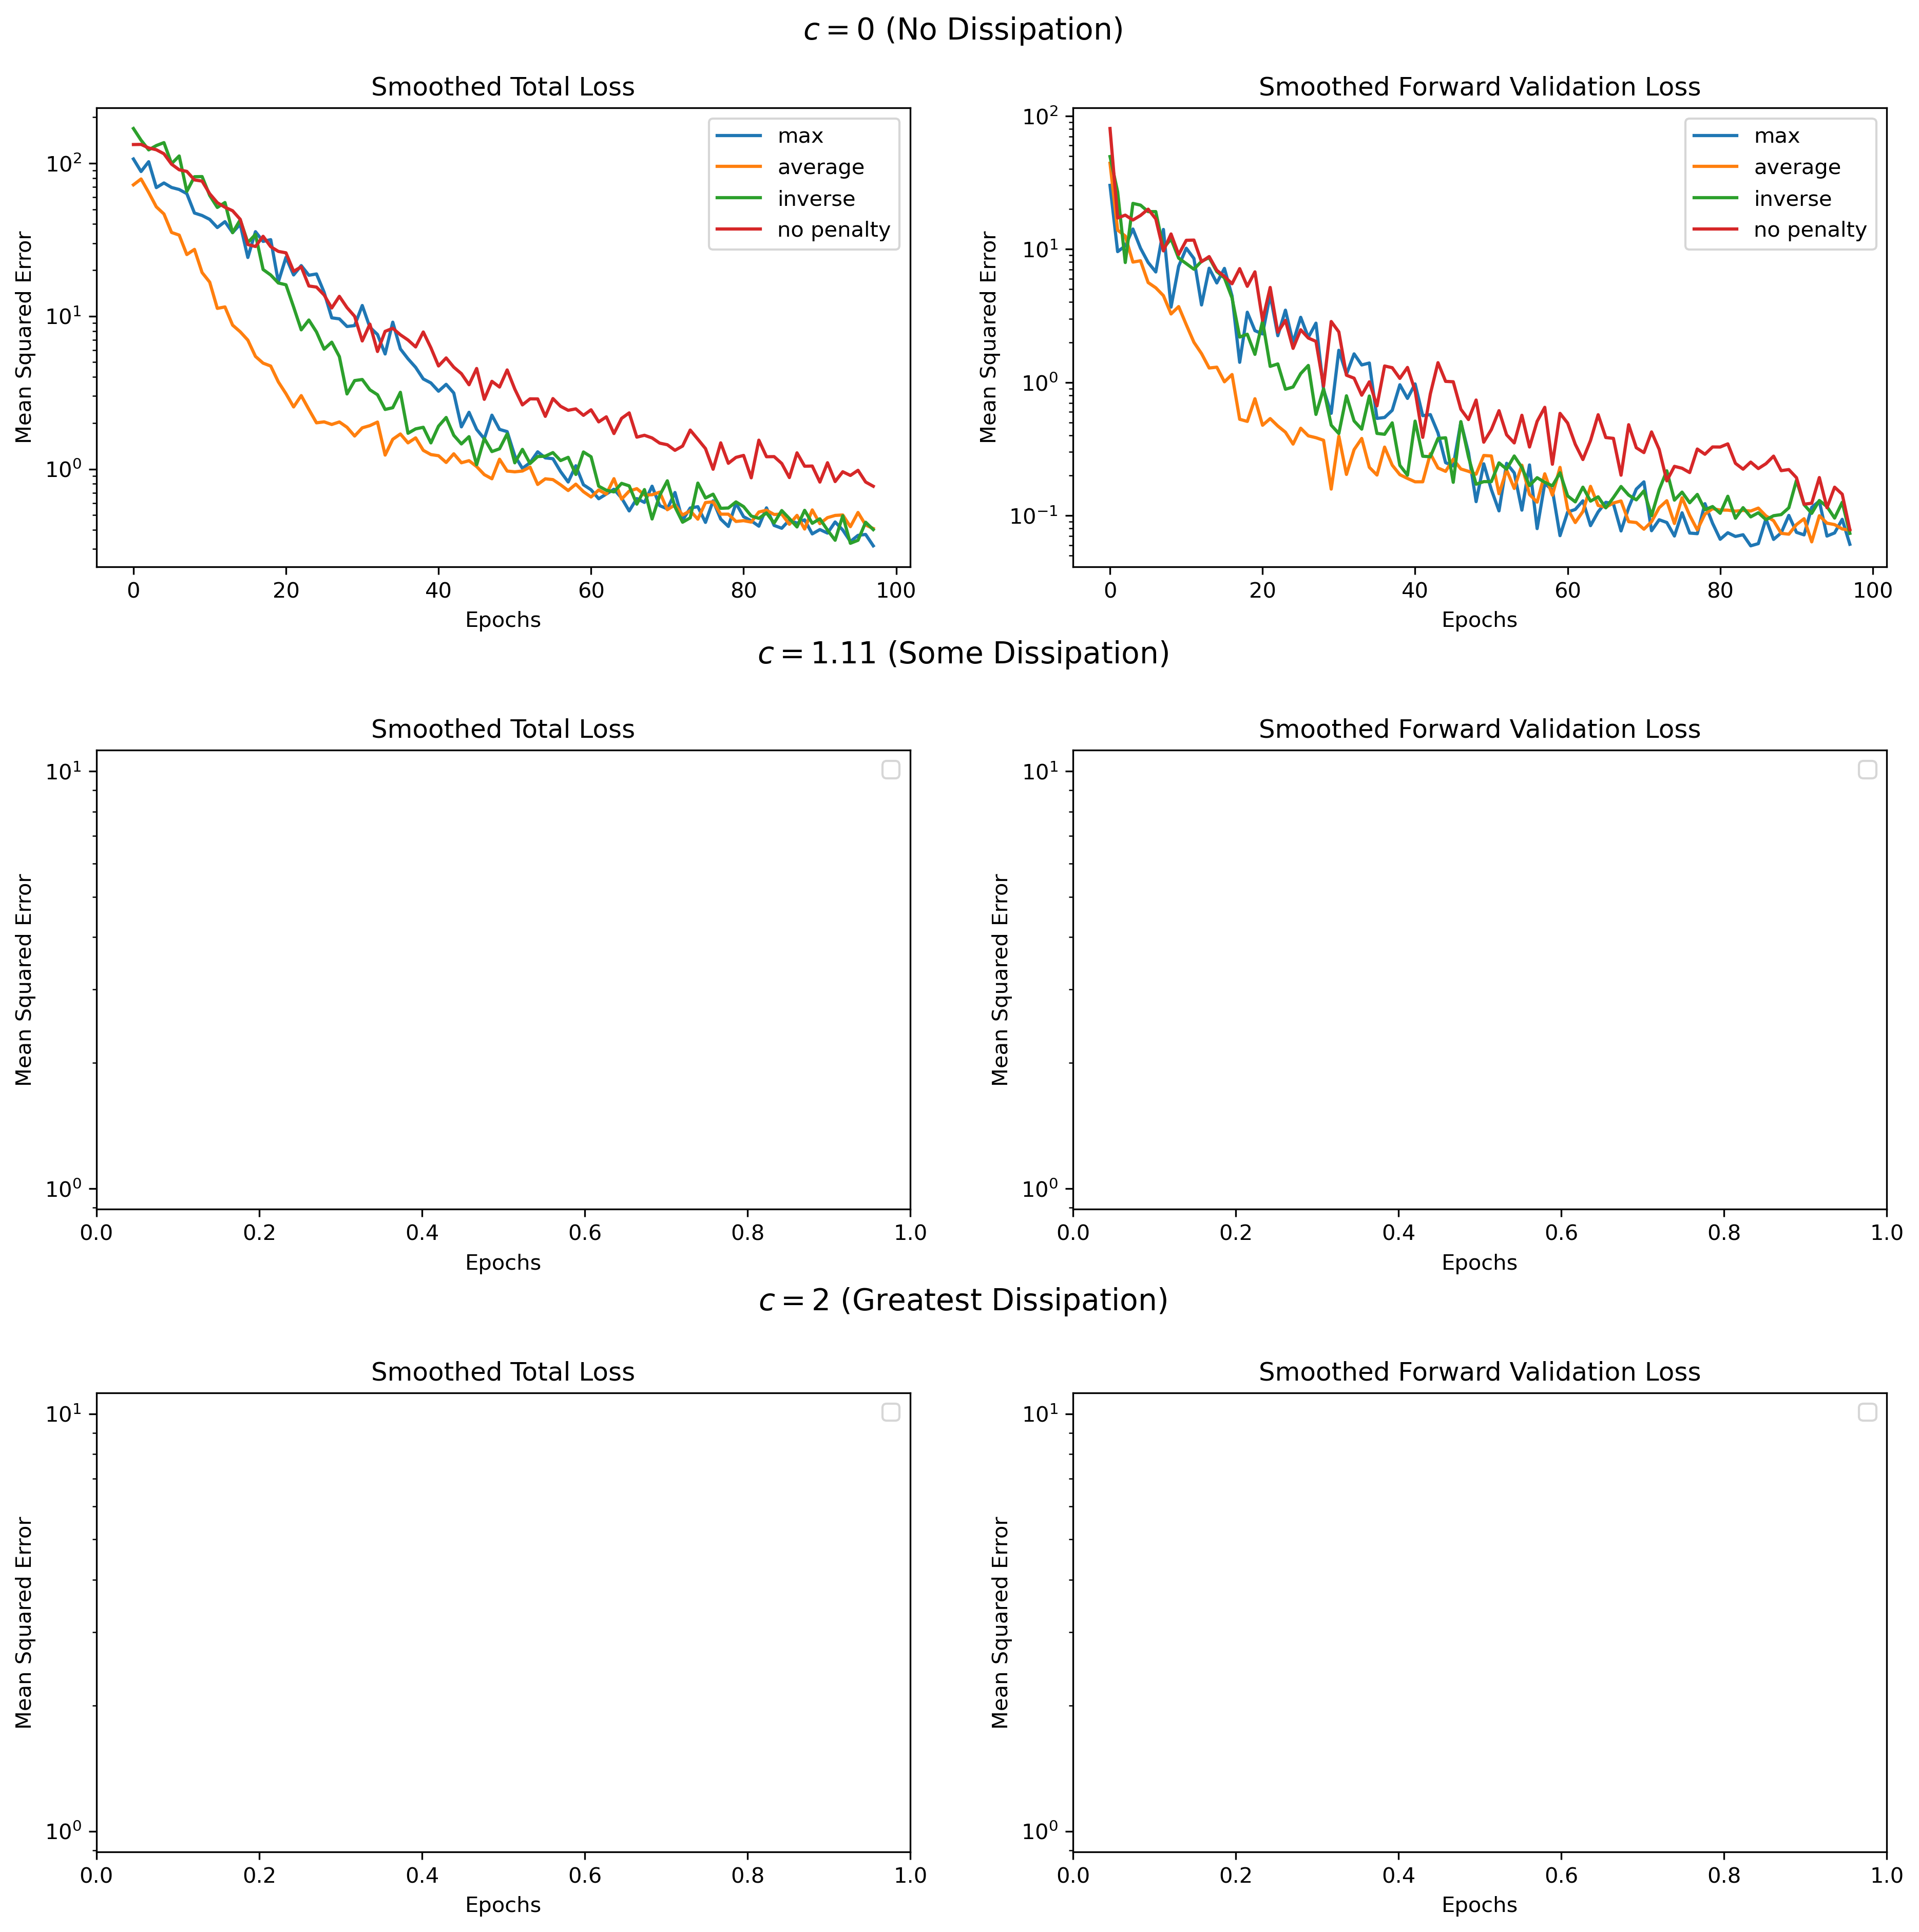

In [36]:
fig, axs = plt.subplots(3,2,figsize=(15,15), dpi=300)

for label, item_list in final_list_loss_diss0.items():
    if label.endswith('gaussian element'):
        if label.split('-')[0] == 'no':
            axs[0][0].plot(list(range(0,98)),item_list[:98], label='no penalty')
        else:
            axs[0][0].plot(list(range(0,98)),item_list[:98], label=label.split('-')[0])
        
for label, item_list in final_list_val_diss0.items():
    if label.endswith('gaussian element'):
        if label.split('-')[0] == 'no':
            axs[0][1].plot(list(range(0,98)),item_list[:98], label='no penalty')
        else:
            axs[0][1].plot(list(range(0,98)),item_list[:98], label=label.split('-')[0])
        
#     axs[0][0].plot(final_list_loss_diss0['max-gaussian element'].ewm(span = 10).mean(),
#          label=f'{labels_graph_diss0[i]}')
#     axs[0][1].plot(df_diss0_val[f'{label} - forward validation'].ewm(span = 10).mean(),
#          label=f'{labels_graph_diss0[i]}')

# for i, label in enumerate(labels_diss5):
#     axs[1][0].plot(df_diss5_loss[f'{label} - loss'].ewm(span = 10).mean(),
#          label=f'{labels_graph_diss5[i]}')
#     axs[1][1].plot(df_diss5_val[f'{label} - forward validation'].ewm(span = 10).mean(),
#          label=f'{labels_graph_diss5[i]}')

# for i, label in enumerate(labels_diss9):
#     axs[2][0].plot(df_diss9_loss[f'{label} - loss'].ewm(span = 10).mean(),
#          label=f'{labels_graph_diss9[i]}')
#     axs[2][1].plot(df_diss9_val[f'{label} - forward validation'].ewm(span = 10).mean(),
#          label=f'{labels_graph_diss9[i]}')

for l in axs:
    for ax in l:
        ax.set_xlabel('Epochs')
        ax.set_ylabel('Mean Squared Error')
        ax.set_yscale('log')
        ax.legend(loc=1)

    l[0].set_title('Smoothed Total Loss')
    l[1].set_title('Smoothed Forward Validation Loss')
    
plt.figtext(0.5,0.92, "$c = 0$ (No Dissipation)", ha="center", va="top", fontsize=14)
plt.figtext(0.5,0.65, "$c = 1.11$ (Some Dissipation)", ha="center", va="top", fontsize=14)
plt.figtext(0.5,0.37, "$c = 2$ (Greatest Dissipation)", ha="center", va="top", fontsize=14)
plt.subplots_adjust(hspace = 0.4 )

# axs[0].set_xlabel('Epochs')
# axs[1].set_ylabel('Mean Squared Error')


# plt.plot(df['gaussian_double_dist_init-pendulum - forward loss'].ewm(span = 10).mean(),
#          label='None')
# plt.plot(df['Maximal eigen-loss without eigen-initialisation - forward loss'].ewm(span = 10).mean(), 
#          label='Loss')
# plt.plot(df['spectral_init_uniform-cyclone - forward loss'].ewm(span = 10).mean(), 
#          label='Initialisation')
# plt.plot(df['sepctral_eigen_init_with_2_to_2_uniform_distribution - forward loss'].ewm(span = 10).mean(), 
#          label='Initialisation & Loss')
# plt.ylim(0.1,1)
# plt.xlim(0,50)
# plt.title(name)

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


no-penalty-uniform
no-penalty-gaussian
no-penalty-double-gaussian
no-penalty-uniform-small
no-penalty-gaussian element


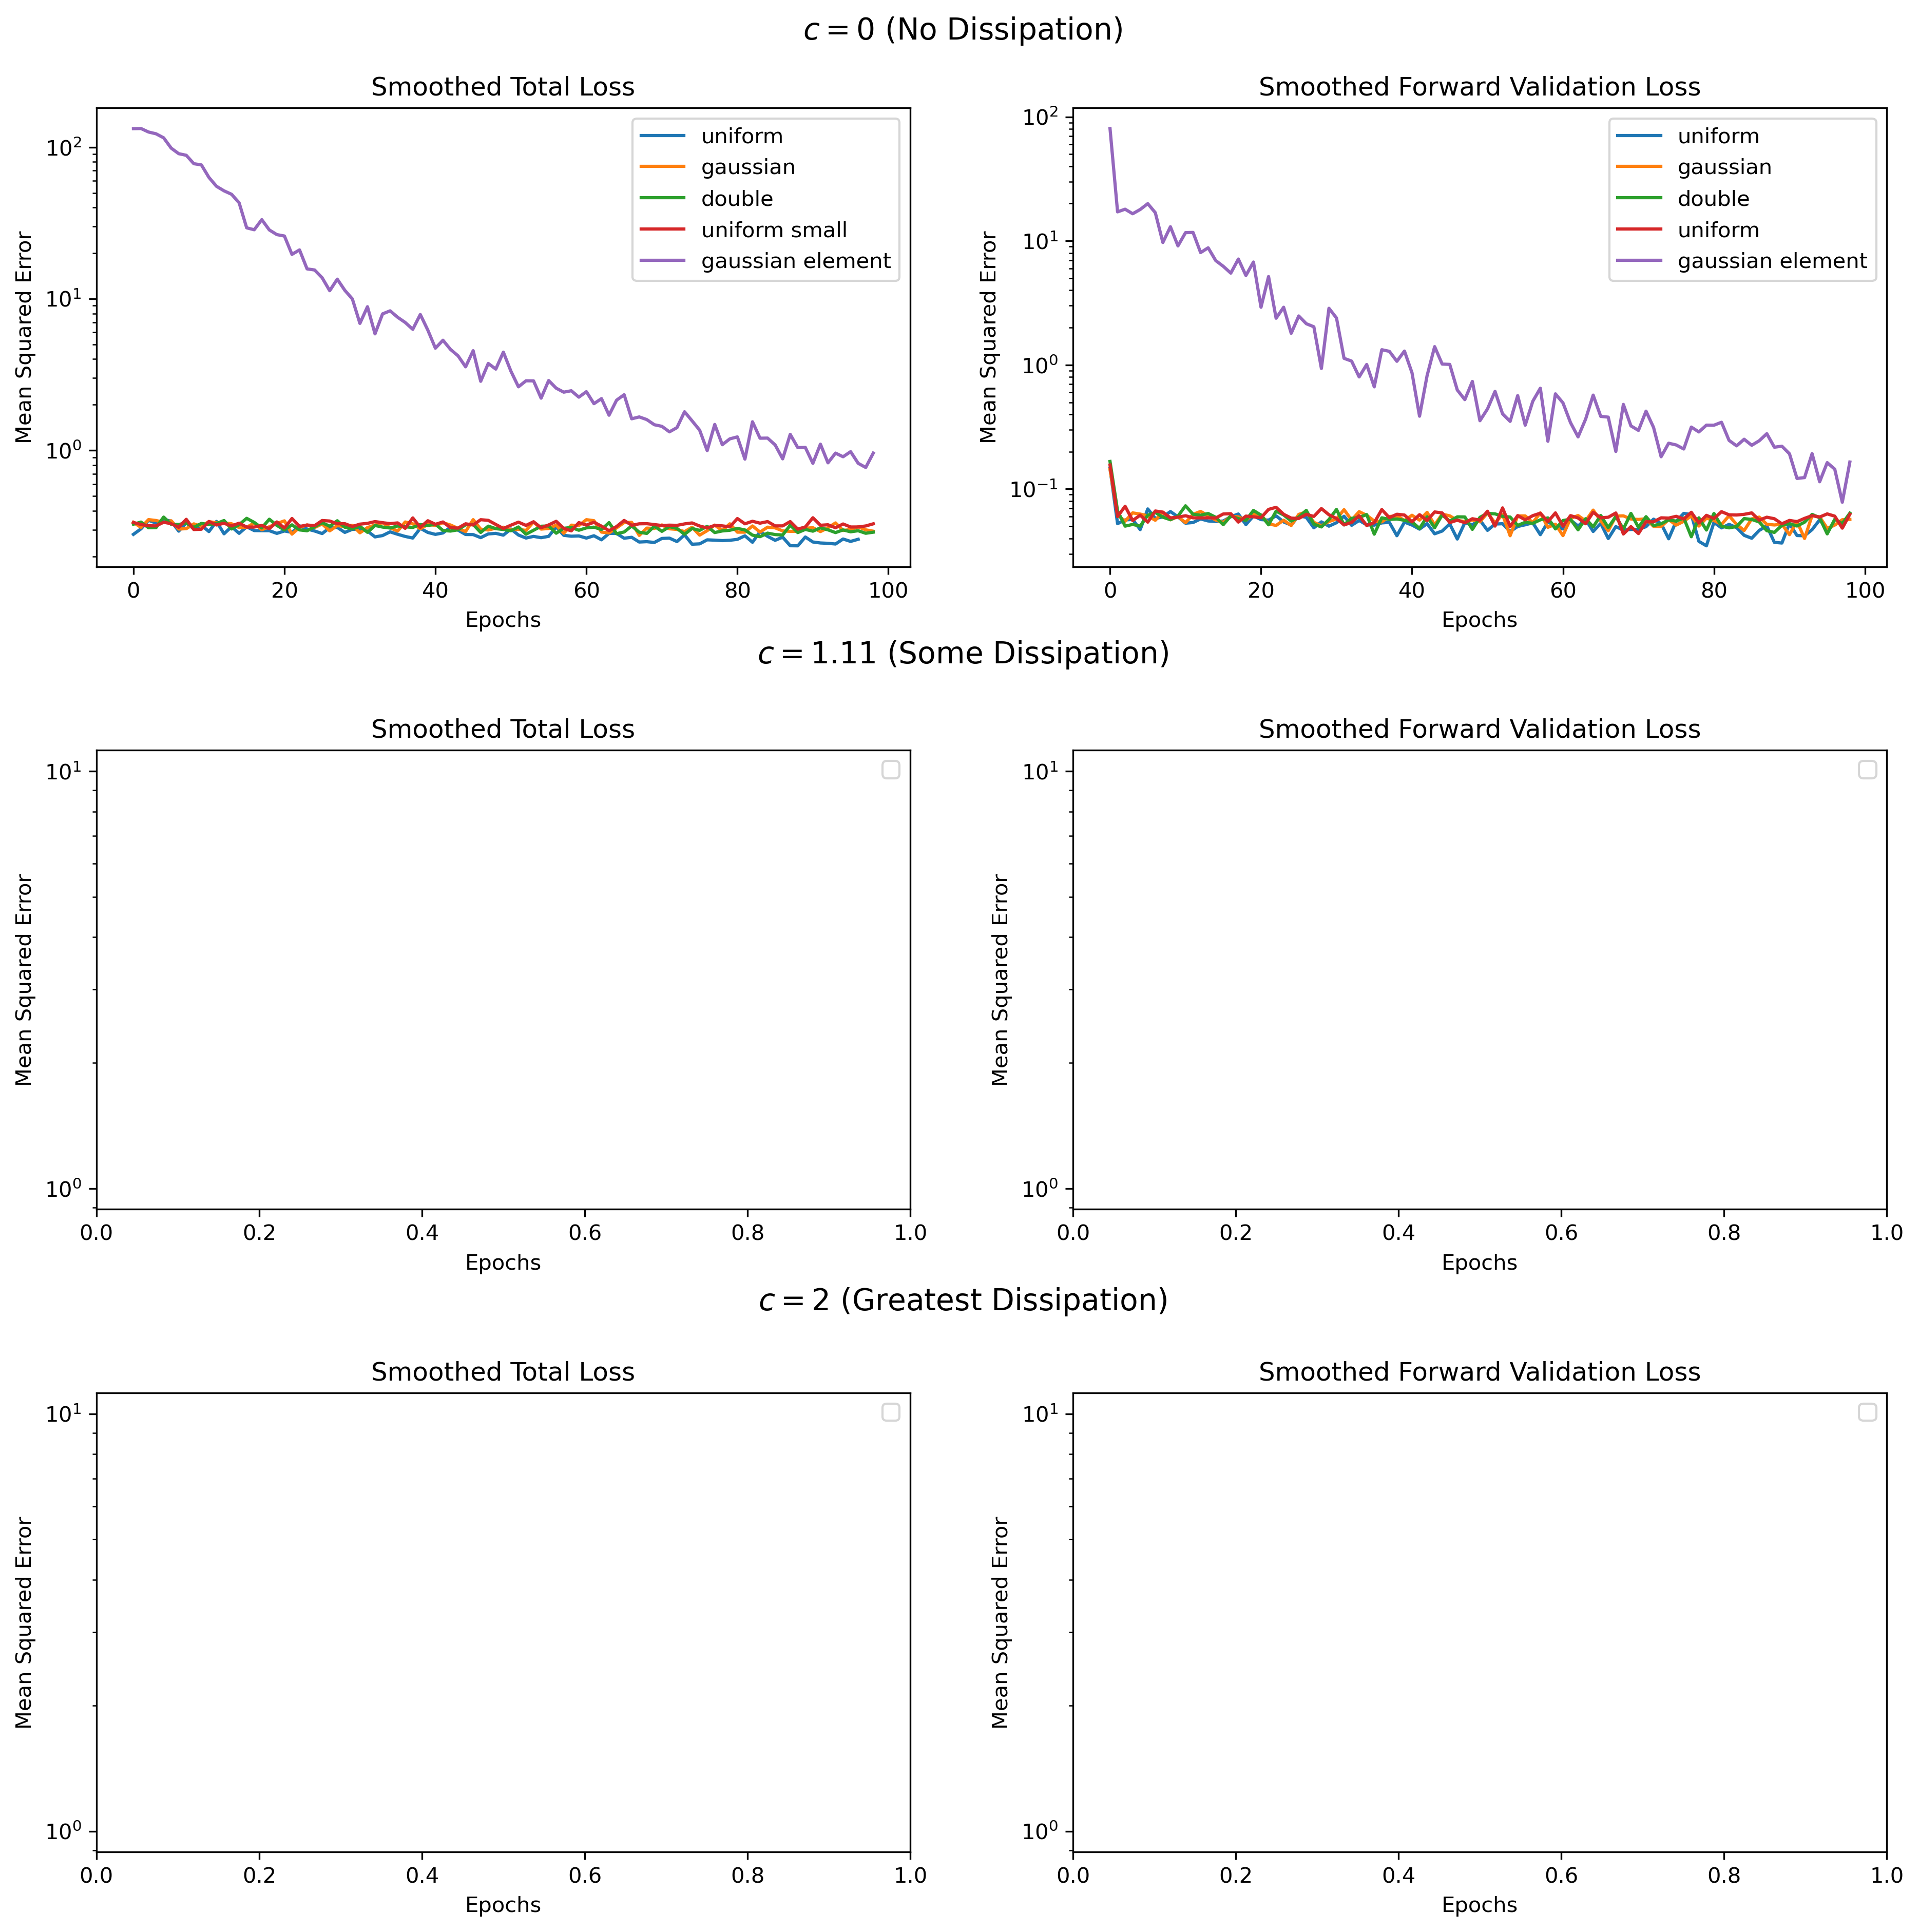

In [34]:
fig, axs = plt.subplots(3,2,figsize=(15,15), dpi=300)

for label, item_list in final_list_loss_diss0.items():
    if label.startswith('no-penalty'):
        print(label)
        if label.endswith('uniform-small'):
            lbl = 'uniform small'
        else:
            lbl = label.split('-')[2]
            
        axs[0][0].plot(list(range(0,len(item_list))),item_list, label=lbl)
        
for label, item_list in final_list_val_diss0.items():
    if label.startswith('no-penalty'):
        axs[0][1].plot(list(range(0,len(item_list))),item_list, label=str(label.split('-')[2]))

for l in axs:
    for ax in l:
        ax.set_xlabel('Epochs')
        ax.set_ylabel('Mean Squared Error')
        ax.set_yscale('log')
        ax.legend(loc=1)

    l[0].set_title('Smoothed Total Loss')
    l[1].set_title('Smoothed Forward Validation Loss')
        
plt.figtext(0.5,0.92, "$c = 0$ (No Dissipation)", ha="center", va="top", fontsize=14)
plt.figtext(0.5,0.65, "$c = 1.11$ (Some Dissipation)", ha="center", va="top", fontsize=14)
plt.figtext(0.5,0.37, "$c = 2$ (Greatest Dissipation)", ha="center", va="top", fontsize=14)
plt.subplots_adjust(hspace = 0.4 )